In [1]:
import numpy as np
import state_space
from state_space.state_space import StateSpace
from state_space.transfer_function import Transfer
from state_space.pid_controller import PIDController
from state_space.system_graph import SystemGraph
from state_space.system import Pendulm
from state_space.simulator import TimerVariable

In [21]:
system = Pendulm(1,1)
actuator = StateSpace.from_system(system)
actuator.init(np.array([[0.1],[0]]))
T = 1
# actuator = Transfer((2,),(T,1))

In [34]:
pid = PIDController()
actuator.reset()
input = TimerVariable(fn=lambda t:-0.1)
graph = SystemGraph(systems=[input,pid,actuator],
                    output=2,
                    connections=(((0,2),1,(1,-1)),
                                 (1,2)))

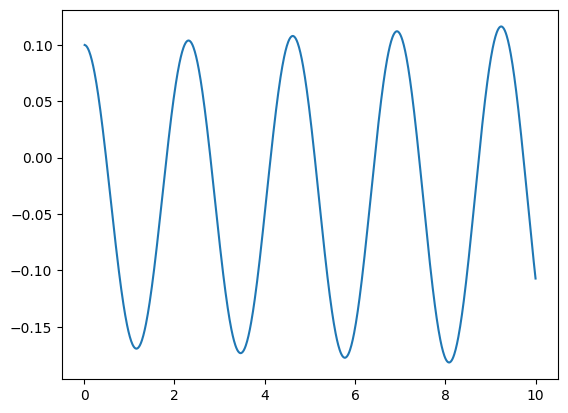

array([10.        , -0.10725812])

In [37]:
graph.reset()
pid.reset()
pid.kp = 10
pid.ki = 0
pid.kd = 0
y = graph.simulate()
y[-1]

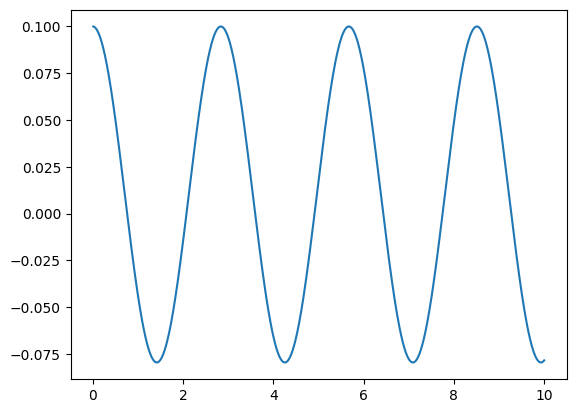

array([[ 0.01      ,  0.09997548],
       [ 0.02      ,  0.09990691],
       [ 0.03      ,  0.09979433],
       ...,
       [ 9.98      , -0.07902618],
       [ 9.99      , -0.07877635],
       [10.        , -0.07848288]])

In [24]:
system = Pendulm(1,1)
actuator = StateSpace.from_system(system)
actuator.init(np.array([[0.1],[0]]))
actuator.u = 0.2
actuator.simulate()

In [11]:
actuator._B@actuator.u*actuator.Ts

array([[0.e+00],
       [2.e-06]])